# cloud-competition-solution
Solution de la competition Understanding clouds proposée par Chris Deotte et commentée par Asser IDOSSOU et Charles Dorian NGANKAM

# Description de la compétition
https://www.kaggle.com/c/understanding_cloud_organization


# Objectif
Le but ici est de créer un algorithme de classification des modèles(patterns) d'organisation des nuages à partir d'images satellites. Cela aidera les scientifiques à mieux comprendre comment les nuages influencent le climat futur. Cette recherche guidera le développement de modèles de nouvelle génération qui pourraient réduire les incertitudes dans les projections climatiques.

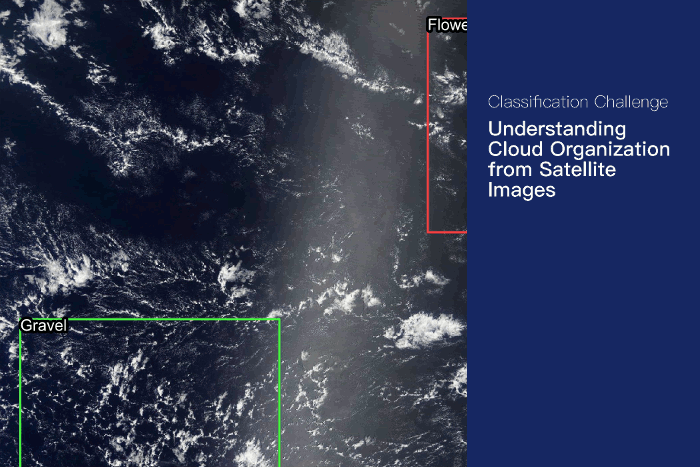

https://www.github.com/asseridos/cloud-competition-solution/images/Teaser_AnimationwLabels.gif

# Données
Comme dit ci-desssus, il s'agit d'un problème de classification. Il faut identifier les régions des images satellites fournies qui correspondent aux types de nuages définis dont les labels sont :

*   'Fish'
*   'Flower'
*   'Gravel'
*   'Sugar'





Pour être plus explicite, il faudra segmenter chaque image de l'ensemble de test en différentes régions (suites de pixels) correspondant à des types de nuages. Ainsi, chaque image contient au moins un type de nuage et peut contenir tous les 4 types de nuages.

Le segment (la région) correspondant à chaque label de type de nuage pour une image est codé sur une seule ligne, même s'il existe plusieurs zones non contiguës du même type dans une image. S'il n'y a pas de zone d'un certain type de nuage pour une image, la prédiction EncodedPixels correspondante doit être laissée vide.

# Liste des fichiers
- train.csv - les segmentations pour chaque paire image-label dans les images d'entraînement. Ces segmentations sont au format RLE(Run Length Encoded)

- train_images.zip - dossier contenant les images d'entraînement

- test_images.zip - dossier contenant les images de test; la tâche est de prédire les masques de segmentation de chacun des 4 types de nuages (labels) pour chaque image. Il est important de noter également que les masques de prédiction doivent être réduits à 350 x 525 px.

- sample_submission.csv - un exemple de fichier de soumission au format correct


# Métriques

## Coefficient de similarité de Dice
Cette compétition est évaluée sur la base du coefficient de Dice.
Le coefficient encore connu sous le nom d'indice de Sorensen-Dice est un indicateur statistique qui mesure la similarité de deux échantillons. Cet indice a pour formule générale :

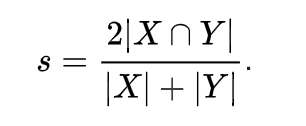

où |X| est le nombre d'éléments de X et |Y| le nombre d'éléments de Y. L'indice peut varier de 0 (quand X et Y sont disjoints) à 1 (quand X et Y sont égaux).
Dans le cas de cette compétition, ces opérations peuvent être exprimées en terme d'opérations vectorielles sur les vecteurs X et Y. Le coefficient de Dice est donc utilisé ici pour comparer la similarité pixel-pixel entre une segmentation prédite et la vérité.


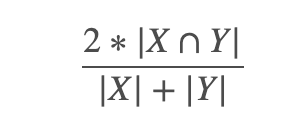


où X est l'ensemble de pixels prédits et Y l'ensemble de pixels correspondant à la vérité. Lorsque X et Y sont vides, il n'est pas possible de calculer cette formule  puisqu'on se retrouve face à une indétermination. Dans ce cas spécifique, le coefficient prend automatiquement la valeur 1. Le score correspond en fin de compte à la moyenne des coefficients de Dice pour chaque paire <Image, Label> de l'ensemble de test.

## Encodage des pixels (RLE)
Au lieu de soumettre en résultat les indices correspondant à chaque pixel de la prédiction (par exemple '1,2,3' pour les pixels aux indices 1, 2 et 3), les résultats des prédictions seront soumis sous le format d'encodage RLE(Run Length Encoded) consistant à donner des paires de valeurs qui contiennent une valeur de départ et une longueur. Ainsi, pour l'exemple '1,2,3' on aura plutôt '1,3'; ce qui implique que les pixels concernés commencent à 1 et possèdent une longueur de 3 pixels donc ('1,2,3'). Ce format d'encodage est utilisé pour réduire la taille du fichier de soumission.
Le format de la compétition nécessite une liste de paires délimitée par des espaces. Par exemple, «1 3 10 5» implique que les pixels 1, 2, 3, 10, 11, 12, 13, 14 doivent être inclus dans le masque. La métrique vérifie que les paires sont triées, positives et que les valeurs de pixels décodées ne sont pas dupliquées. Les pixels sont numérotés de haut en bas, puis de gauche à droite: 1 est le pixel (1,1), 2 est le pixel (2,1), etc.

## Format du fichier de soumission
Le fichier de soumission doit être au format csv, avec un en-tête et des noms de colonnes: Image_Label, EncodedPixels. Chaque ligne de la soumission représente une segmentation de type de nuage prédit unique pour l'image donnée et le label prédit, et on doit avoir le même nombre de lignes que num_images * num_labels. S'il n'y a pas de zone d'un certain type de nuage pour une image, la prédiction EncodedPixels correspondante doit être laissée vide.

# Important
Les prédictions doivent correspondre à des images mises à l'échelle de 0,25 de chaque côté. En d'autres termes, sachant que les images dans Train et Test sont de 1400 x 2100 pixels, les prédictions doivent être réduites à une image de 350 x 525 pixels. La réduction est nécessaire pour obtenir des temps d'évaluation raisonnables.